In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from typing import *
sys.path.append(os.sep.join(os.getcwd().split(os.sep)[:-1]))
from src.utils import get_experiment_cell_death_times_by_specific_siliding_window,read_experiment_cell_xy_and_death_times
from src.quanta_utils import get_neighbors
import seaborn as sns
savefig = False

## figure 2H

In [2]:
filtered_df = pd.read_csv(os.sep.join(os.getcwd().split(os.sep)[:-1])+"/results/AllExperimentsSPIs_updated.csv")
filtered_df = filtered_df[(~filtered_df['Experiment_name'].str.contains('pure|colony|SKT|outl|ROI#2|mixed', case=False, na=False))]#& ~filtered_df['Origin'].str.contains('field14_two_colony'))]


In [7]:
filtered_df

,Experiment_name,SPI,Treatment,Cell Line + Treatment,Cell Line,Origin,Mode,Density,pvalue,sliding_time_window_size,neighbors_dist_threshold
0,field13_crop-001_ROI#1_annotation_apop.csv,0.100668,Apoptosis,MCF10A+field13_crop-001_roi#1_annotation_apop.csv,MCF10A,field13_colony,Apoptosis,237,0.000,5,33
1,field13_crop-001_ROI#1_annotation_nec.csv,0.373883,Necrosis,MCF10A+field13_crop-001_roi#1_annotation_nec.csv,MCF10A,field13_colony,Necrosis,309,0.000,5,33
2,Field14-002_ROI#1_annotation_apop.csv,0.208029,Apoptosis,MCF10A+field14-002_roi#1_annotation_apop.csv,MCF10A,field14_colony,Apoptosis,387,0.000,5,33
3,Field14-002_ROI#1_annotation_nec.csv,0.424343,Necrosis,MCF10A+field14-002_roi#1_annotation_nec.csv,MCF10A,field14_colony,Necrosis,249,0.000,5,33
4,7-20-23_10arednuclei_ROI#10_annotation_apop.csv,-1.266667,Apoptosis,MCF10A+7-20-23_10arednuclei_roi#10_annotation_...,MCF10A,field11_colony,Apoptosis,47,0.755,5,33
...,...,...,...,...,...,...,...,...,...,...,...
322,Field14-002_ROI#1_annotation_nec.csv,0.137631,Necrosis,MCF10A+field14-002_roi#1_annotation_nec.csv,MCF10A,field14_colony,Necrosis,249,0.000,120,200
323,7-20-23_10arednuclei_ROI#10_annotation_apop.csv,0.098280,Apoptosis,MCF10A+7-20-23_10arednuclei_roi#10_annotation_...,MCF10A,field11_colony,Apoptosis,47,0.003,120,200
324,7-20-23_10arednuclei_ROI#10_annotation_nec.csv,0.274686,Necrosis,MCF10A+7-20-23_10arednuclei_roi#10_annotation_...,MCF10A,field11_colony,Necrosis,142,0.000,120,200
325,7-20-23_10arednuclei_ROI#13_or14_both_colonies...,0.249891,Apoptosis,MCF10A+7-20-23_10arednuclei_roi#13_or14_both_c...,MCF10A,field14_two_colony,Apoptosis,248,0.000,120,200


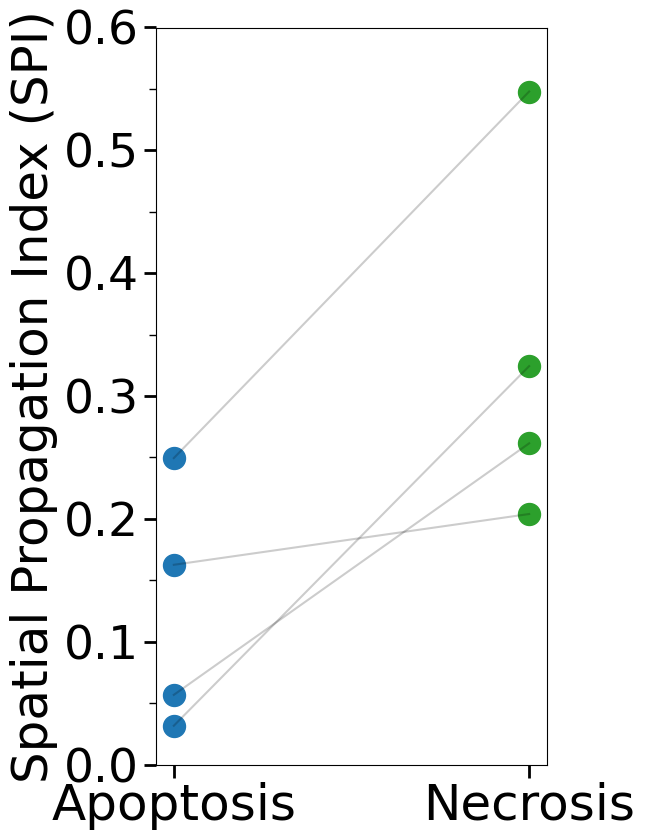

In [4]:


# Example data
custom_palette =  {"Apoptosis": "#1f77b4", "Necrosis": "#2ca02c"}#{"ApoptosisInColonies": "#bf7745", "NecrosisInColonies": "#f5e18a"}
{"ApoptosisInColonies": "#1f77b4", "NecrosisInColonies": "#2ca02c"}
{"apoptosis": "#bf7745", "necrosis": "#f5e18a"}

# Replace treatment with origin and group values
# Filter the data for distance of 100 and sliding time window of 10
filtered_subset = filtered_df[
    (filtered_df['neighbors_dist_threshold'] == 100) &
    (filtered_df['sliding_time_window_size'] == 10)
]
origins = filtered_subset['Origin'].unique()
group_a_values = []
group_b_values = []
treatment_labels = []
markers = ['o', 'o', 'o', 'o'] #markers = ['o', 'x', 's', '+']
origin_marker_dict = {origin: markers[i % len(markers)] for i, origin in enumerate(origins)}
# X positions: 0 for Group A, 1 for Group B
x_a = np.zeros(len(origins))
x_b = np.ones(len(origins))
# Assign markers based on origin
origin_markers = [origin_marker_dict[origin] for origin in origins]
for origin in origins:
    subset = filtered_subset[filtered_subset['Origin'] == origin]
    group_a = subset[subset['Treatment'] == 'Apoptosis']['SPI'].mean()
    group_b = subset[subset['Treatment'] == 'Necrosis']['SPI'].mean()
    if not np.isnan(group_a) and not np.isnan(group_b):
        group_a_values.append(group_a)
        group_b_values.append(group_b)
        treatment_labels.append(origin)  # Use treatment labels instead of origin

# Plot
plt.figure(figsize=(6.5, 8.5))

for i in range(len(treatment_labels)):
    # Line connecting values
    plt.plot([x_a[i], x_b[i]], [group_a_values[i], group_b_values[i]], 'k-', alpha=0.2)
    # Group A point
    plt.scatter(x_a[i], group_a_values[i], color=custom_palette['Apoptosis'], marker=origin_markers[i], label='Apoptosis' if i == 0 else "", s=250)
    # Group B point
    plt.scatter(x_b[i], group_b_values[i], color=custom_palette['Necrosis'], marker=origin_markers[i], label='Necrosis' if i == 0 else "", s=250)

custom_legend = [Line2D([0], [0], marker=marker, color='k', markerfacecolor='k', markersize=10, label=origin)
                 for origin, marker in origin_marker_dict.items()]
# Formatting
plt.xticks([0, 1], ['Apoptosis', 'Necrosis'], fontsize=36)
plt.gca().tick_params(axis='x', which='major', length=9, width=2, labelsize=36)
plt.gca().tick_params(axis='y', which='major', length=9, width=2, labelsize=34)
plt.gca().tick_params(axis='y', which='minor', length=5, width=1)
plt.gca().set_yticks(np.arange(0.0, 0.7, 0.05), minor=True)
# plt.yticks(np.arange(0.0, 0.7, 0.05), fontsize=22)
# plt.yticks(fontsize = 22)
plt.ylabel("Spatial Propagation Index (SPI)", fontsize = 36)
# plt.title("SPI Values Across Treatments")
plt.ylim(0.0, 0.6)
plt.legend(handles=custom_legend, title="Origins", loc='lower right').remove()
plt.grid(False)
plt.tight_layout()
plt.gca().set_facecolor('none')
if savefig:
    plt.savefig(os.sep.join(os.getcwd().split(os.sep)[:-1])+"results/newSPIAcrossOrigins_paperf_dc_r.svg", format="svg", facecolor='none')
plt.show()


## figure 2G

In [5]:
exps_dir_name = os.sep.join(os.getcwd().split(os.sep)[:-1]) + "/data/mixed_death_annotations/"
meta_data_file_full_path= os.sep.join(os.getcwd().split(os.sep)[:-1]) + "/data/metadata.csv"
meta_data_extract_exp_names= pd.read_csv(meta_data_file_full_path)
exp_names = meta_data_extract_exp_names.iloc[:,1]

In [6]:
exp_names_u = exp_names[exp_names.str.contains('mixed')].reset_index(drop=True)
exp_names_u =[exp_names_u[3], exp_names_u[0],exp_names_u[2],exp_names_u[1]]
exp_names_u

['7-20-23_10arednuclei_ROI#13_or14_both_colonies_annotation_mixed.csv',
 'field13_crop-001_ROI#1_annotation_mixed.csv',
 '7-20-23_10arednuclei_ROI#10_annotation_mixed.csv',
 'Field14-002_ROI#1_annotation_mixed.csv']

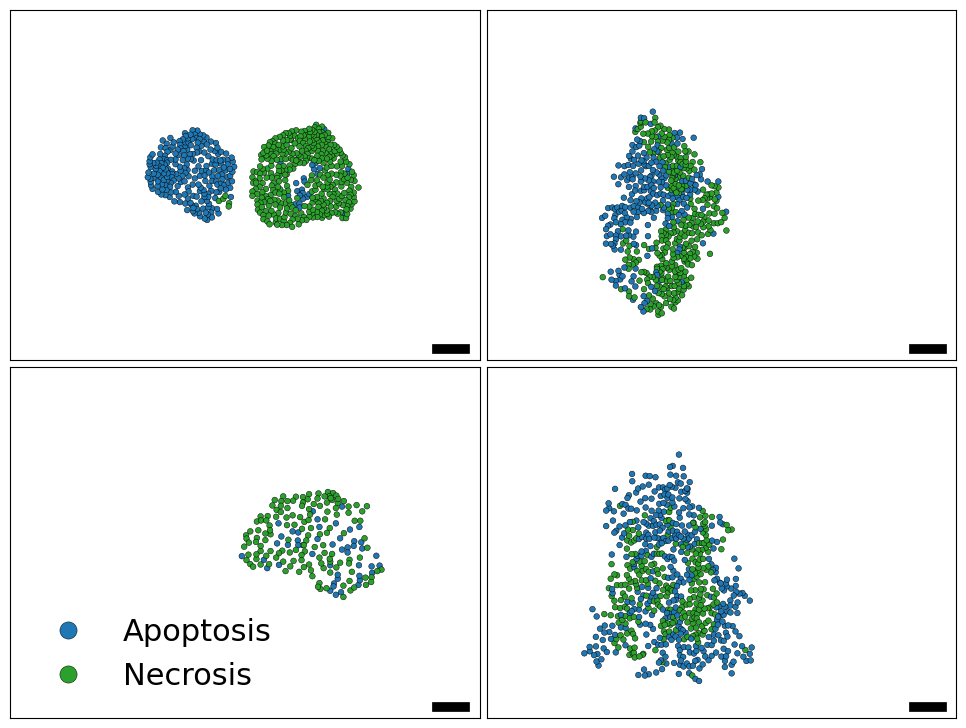

In [7]:


custom_palette = {"Apoptosis": "#1f77b4", "Necrosis": "#2ca02c", "Other": "lightgray"}
# custom_palette = {"apoptosis": "#bf7745", "necrosis": "#fcf1c5"}
# custom_palette_2 = {"apoptosis": "#6d160d", "necrosis": "#d2ad78"}

# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12.3, 9.2), sharex=False, sharey=False)

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Initialize a counter for subplot index
subplot_idx = 0

# Iterate over each file in exp_names
for file_name in exp_names_u:
    if 'mixed' not in file_name:
        continue  # Skip files that do not contain 'mixed'

    # Get metadata for the current file
    metadata = meta_data_extract_exp_names[meta_data_extract_exp_names["File Name"] == file_name]
    if metadata.empty:
        print(f"Metadata not found for {file_name}. Skipping...")
        continue

    size_x = int(metadata["SizeX"].values[0])
    size_y = int(metadata["SizeY"].values[0])
    physical_size_x = float(metadata["PhysicalSizeX"].values[0])
    physical_size_y = float(metadata["PhysicalSizeY"].values[0])

    # Calculate x and y limits
    x_limit = (0, size_x * physical_size_x)
    y_limit = (0, size_y * physical_size_y)

    # Construct the full file path
    file_path = os.path.join(exps_dir_name, file_name)
    if not os.path.exists(file_path):
        print(f"File {file_path} not found. Skipping...")
        continue

    # Read the CSV file
    data = pd.read_csv(file_path)
    data = data[data["Mode"].str.lower().isin(["apoptosis", "necrosis", "apoptotic", "necrotic"])]
    legend_labels = {"apoptotic": "apoptosis", "necrotic": "necrosis"}
    data["Mode"] = data["Mode"].replace(legend_labels)
    data["Mode"] = data["Mode"].str.capitalize()
    if data.empty:
        print(f"No valid data in {file_name}. Skipping...")
        continue

    # Plot combined modes with their respective shades
    sns.scatterplot(
        ax=axs[subplot_idx],
        data=data,
        x="cell_x",
        y="cell_y",
        hue="Mode",
        palette=custom_palette,
        edgecolor="black",
        s=17,
    )
    axs[subplot_idx].set_xlim(x_limit)
    axs[subplot_idx].set_ylim(y_limit)

    # Set the aspect ratio to preserve the original ratio
    aspect_ratio = (x_limit[1] - x_limit[0]) / (y_limit[1] - y_limit[0])
    axs[subplot_idx].set_box_aspect(1 / aspect_ratio)

    # axs[subplot_idx].set_aspect(aspect_ratio)

    # Remove x and y ticks and labels
    axs[subplot_idx].tick_params(axis='both', which='both', length=0, labelbottom=False, labelleft=False)
    axs[subplot_idx].set_xlabel("", fontsize=24)
    axs[subplot_idx].set_ylabel("", fontsize=24)

    # Add a scale bar at the lower-right corner
    scale_bar_length = 100  # Length of the scale bar
    scale_bar_x = x_limit[1] - scale_bar_length - 50  # Position of the scale bar (x-coordinate)
    scale_bar_y = y_limit[0] + 40  # Position of the scale bar (y-coordinate)
    axs[subplot_idx].add_line(Line2D([scale_bar_x, scale_bar_x + scale_bar_length],
                                     [scale_bar_y, scale_bar_y],
                                     color="black", linewidth=7))
    axs[subplot_idx].set_facecolor('none')

    # Remove legend for all but the last subplot
    if subplot_idx == 2:
        axs[subplot_idx].legend(loc="lower left", fontsize=22, scatterpoints=5, markerscale=3, frameon=False)
    else:
        axs[subplot_idx].get_legend().remove()

    # Increment subplot index
    subplot_idx += 1

    # Stop if all subplots are filled
    if subplot_idx >= len(axs):
        break

# Adjust layout and show the plots
# plt.tight_layout()
plt.subplots_adjust(wspace=0.0001, hspace=0.02)  # Minimize space between subplots
if savefig:
    plt.savefig(f"/home/esraan/CellDeathSpreading/results/combined_plots_with_scalebar_rearranged_n.svg", format="svg", facecolor='none')
plt.show()